# IMPORT LIBRARIES AND DATASETS

In [28]:
import pandas as pd
import numpy as np
import datetime as dt

- **Using Pandas library, read JPMorgan Chase & Co. stock prices data contained in "JPM.csv" file and place it in a Pandas DataFrame titled "JPM_df"**
- **Count the number of Null or missing values in "JPM_df" Pandas DataFrame**
- **What is the memory usage of "JPM_df" Pandas DataFrame?**

In [29]:
JPM_df = pd.read_csv('JPM.csv')
JPM_df.isnull().sum()
JPM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1368 non-null   object 
 1   Open       1368 non-null   float64
 2   High       1368 non-null   float64
 3   Low        1368 non-null   float64
 4   Close      1368 non-null   float64
 5   Adj Close  1368 non-null   float64
 6   Volume     1368 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 74.9+ KB


# CALCULATE PERCENTAGE DAILY RETURNS

- **Using the adjusted closing price, calculate the percentage daily return for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022.**
- **Calculate the maximum percentage daily return for JPMorgan Chase & Co. stock over the same time period.**

In [30]:
JPM_df = pd.read_csv('JPM.csv')
JPM_df['Daily Return'] = JPM_df['Adj Close'].pct_change(1) * 100
print(JPM_df['Daily Return'].max())

18.012495662164163


In [31]:
JPM_df['Daily Return'].replace(np.nan, 0, inplace = True)
JPM_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200,0.000000
1,7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200,-0.932243
2,7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400,-0.350140
3,7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200,0.142732
4,7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700,0.000000
...,...,...,...,...,...,...,...,...
1363,12/12/2022,132.399994,134.649994,131.600006,134.210007,134.210007,8841600,1.551152
1364,12/13/2022,136.889999,137.089996,133.080002,134.080002,134.080002,10025400,-0.096867
1365,12/14/2022,133.779999,135.710007,132.759995,133.410004,133.410004,9966100,-0.499700
1366,12/15/2022,131.149994,132.080002,129.050003,130.100006,130.100006,12087800,-2.481072


# PERFORM DATA VISUALIZATION FOR A SINGLE STOCK: PART 1

In [13]:
!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

!pip install plotly.express
import plotly.express as px

In [32]:
# Define a function that performs interactive data visualization using Plotly Express
def plot_financial_data(df, title):
    
    fig = px.line(title = title)
    
    # For loop that plots all stock prices in the pandas dataframe df
    # Note that index starts with 1 because we want to skip the date column
    
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
        fig.update_traces(line_width = 5)
        fig.update_layout({'plot_bgcolor': "white"})

    fig.show()

**PRACTICE OPPORTUNITY:**
- **Plot the high, low, open, close and adjusted close price for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022 using Plotly Express library.**
- **Plot the trading volume for JPMorgan Chase & Co. stock during the same time period using Plotly Express Library.**
- **Plot the percentage daily return during the same time period using Plotly Express. Perform a sanity check by comparing the maximum percentage daily return calculated in the previous practice opportunity to the maximum value shown on the graph.**

In [33]:
JPM_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200,0.000000
1,7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200,-0.932243
2,7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400,-0.350140
3,7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200,0.142732
4,7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700,0.000000
...,...,...,...,...,...,...,...,...
1363,12/12/2022,132.399994,134.649994,131.600006,134.210007,134.210007,8841600,1.551152
1364,12/13/2022,136.889999,137.089996,133.080002,134.080002,134.080002,10025400,-0.096867
1365,12/14/2022,133.779999,135.710007,132.759995,133.410004,133.410004,9966100,-0.499700
1366,12/15/2022,131.149994,132.080002,129.050003,130.100006,130.100006,12087800,-2.481072


In [34]:
plot_financial_data(JPM_df.drop(['Volume', 'Daily Return'], axis = 1), '(JPM) Stock Price [$]')

# PERFORM DATA VISUALIZATION FOR A SINGLE STOCK: PART 2

In [36]:
# Define a function that classifies the returns based on the magnitude
# Feel free to change these numbers
def percentage_return_classifier(percentage_return):
    
    if percentage_return > -0.3 and percentage_return <= 0.3:
        return 'Insignificant Change'
    elif percentage_return > 0.3 and percentage_return <= 3:
        return 'Positive Change'
    elif percentage_return > -3 and percentage_return <= -0.3:
        return 'Negative Change'
    elif percentage_return > 3 and percentage_return <= 7:
        return 'Large Positive Change'
    elif percentage_return > -7 and percentage_return <= -3:
        return 'Large Negative Change'
    elif percentage_return > 7:
        return 'Bull Run'
    elif percentage_return <= -7:
        return 'Bear Sell Off'

- **Using Matplotlib library, plot a similar pie chart for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022.**

In [37]:
JPM_df['Trend'] = JPM_df['Daily Return'].apply(percentage_return_classifier)
JPM_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend
0,7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200,0.000000,Insignificant Change
1,7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200,-0.932243,Negative Change
2,7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400,-0.350140,Negative Change
3,7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200,0.142732,Insignificant Change
4,7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700,0.000000,Insignificant Change
...,...,...,...,...,...,...,...,...,...
1363,12/12/2022,132.399994,134.649994,131.600006,134.210007,134.210007,8841600,1.551152,Positive Change
1364,12/13/2022,136.889999,137.089996,133.080002,134.080002,134.080002,10025400,-0.096867,Insignificant Change
1365,12/14/2022,133.779999,135.710007,132.759995,133.410004,133.410004,9966100,-0.499700,Negative Change
1366,12/15/2022,131.149994,132.080002,129.050003,130.100006,130.100006,12087800,-2.481072,Negative Change


In [38]:
trend_summary = JPM_df['Trend'].value_counts()
trend_summary

Trend
Positive Change          501
Negative Change          495
Insignificant Change     262
Large Positive Change     53
Large Negative Change     44
Bull Run                   7
Bear Sell Off              6
Name: count, dtype: int64

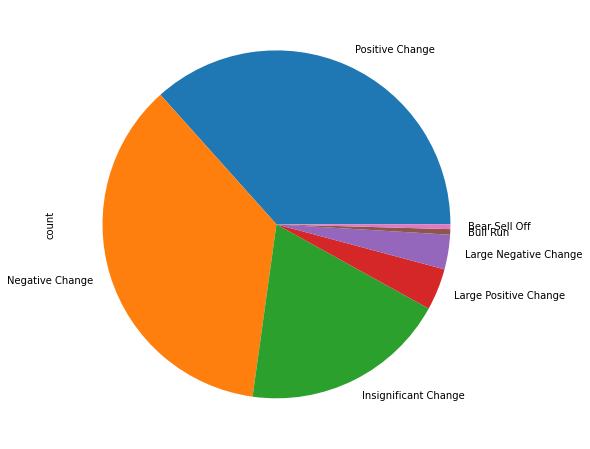

In [39]:
plt.figure(figsize = (8, 8))
trend_summary.plot(kind = 'pie', y = 'Trend');

# PERFORM DATA VISUALIZATION FOR A SINGLE STOCK: PART 3

In [40]:
# Let's plot a candlestick graph using Cufflinks library
# Cufflinks is a powerful Python library that connects Pandas and Plotly for generating plots using few lines of code
# Cufflinks allows for interactive data visualization
! pip install cufflinks
import cufflinks as cf
cf.go_offline() # Enabling offline mode for interactive data visualization locally

- **Using Cufflinks, plot candlestick chart for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022. Remember to set the "Date" column as the index for "JPM_df" Pandas DataFrame.** 
- **Display the simple moving average with 30 and 100 days window on the previously generated candlestick graph.**
- **Display the Bollinger bands on a new candlestick graph. Bollinger bands are powerful technical analysis tool that contain 3 lines: (1) a simple moving average (middle band), (2) an upper and (3) a lower band. Choose a window length of 20 periods and 2 standard deviations. [external research is required]**

In [42]:
figure = cf.QuantFig(JPM_df, title = '(JPM) Candlestick Chart', name = 'JPM')
figure.add_bollinger_bands(periods=20, boll_std=2, colors=['cyan','grey'], fill=True,)
figure.add_volume(name='Volume',up_color='green', down_color='red')
figure.iplot()

# PERFORM DATA VISUALIZATION FOR MULTIPLE STOCKS

In [47]:
# We will focus our analysis on U.S. stocks, similar analysis could be performed on Asian, European or African stocks  
# AMZN: Amazon Inc. - Multinational tech company focusing on e-commerce, cloud computing, and artificial intelligence
# JPM: JPMorgan Chase and Co. - Multinational investment bank and financial services holding company
# META: Meta Platforms, formerly named Facebook Inc. - META owns Facebook, Instagram, and WhatsApp
# PG: Procter and Gamble (P&G) - Multinational consumer goods corporation
# GOOG: Google (Alphabet Inc.) - Multinational company that focuses on search engine tech, e-commerce, Cloud and AI 
# CAT: Caterpillar - World's largest construction-equipment manufacturer
# PFE: Pfizer Inc. - Multinational pharmaceutical and biotechnology corporation
# EXC: Exelon - An American Fortune 100 energy company 
# DE: Deere & Company (John Deere) - Manufactures agricultural machinery and heavy equipment
# JNJ: Johnson & Johnson - A multinational corporation that develops medical devices and pharmaceuticals
close_price_df = pd.read_csv('stock_prices.csv')
close_price_df

,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG
0,1/2/2014,19.898500,69.512543,75.620926,14.121004,27.855856,71.443314,45.640057,54.709999,20.879053,61.941517
1,1/3/2014,19.822001,69.473892,75.956062,13.835152,27.652653,72.086861,45.992889,54.560001,20.920183,61.872295
2,1/6/2014,19.681499,68.561180,75.327690,13.923512,27.960960,72.463608,46.259468,57.200001,20.940746,62.018425
3,1/7/2014,19.901501,68.785461,75.662811,13.996271,28.500000,74.001869,45.726311,57.919998,21.070980,62.618301
4,1/8/2014,20.096001,68.947906,74.850121,13.965082,28.559309,73.899841,46.157543,58.230000,21.214928,61.710812
...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,90.550003,233.059998,437.049988,42.500000,93.309998,177.839996,134.210007,114.709999,52.160000,152.470001
2253,12/13/2022,92.489998,235.490005,437.190002,42.540001,95.629997,179.210007,134.080002,120.150002,53.070000,152.240005
2254,12/14/2022,91.580002,234.479996,438.440002,42.820000,95.070000,179.759995,133.410004,121.589996,54.480000,152.839996
2255,12/15/2022,88.449997,230.660004,429.790008,42.380001,90.860001,177.490005,130.100006,116.150002,53.610001,151.110001


In [48]:
# Function to scale stock prices based on their initial starting price
# The objective of this function is to set all prices to start at a value of 1 
def price_scaling(raw_prices_df):
    scaled_prices_df = raw_prices_df.copy()
    for i in raw_prices_df.columns[1:]:
          scaled_prices_df[i] = raw_prices_df[i]/raw_prices_df[i][0]
    return scaled_prices_df

In [49]:
price_scaling(close_price_df)

,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG
0,1/2/2014,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1/3/2014,0.996155,0.999444,1.004432,0.979757,0.992705,1.009008,1.007731,0.997258,1.001970,0.998882
2,1/6/2014,0.989095,0.986314,0.996122,0.986014,1.003773,1.014281,1.013572,1.045513,1.002955,1.001242
3,1/7/2014,1.000151,0.989540,1.000554,0.991167,1.023124,1.035812,1.001890,1.058673,1.009192,1.010926
4,1/8/2014,1.009925,0.991877,0.989807,0.988958,1.025253,1.034384,1.011338,1.064339,1.016087,0.996275
...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,4.550594,3.352776,5.779485,3.009701,3.349744,2.489246,2.940619,2.096692,2.498198,2.461515
2253,12/13/2022,4.648089,3.387734,5.781336,3.012534,3.433030,2.508422,2.937770,2.196125,2.541782,2.457802
2254,12/14/2022,4.602357,3.373204,5.797866,3.032362,3.412927,2.516121,2.923090,2.222446,2.609314,2.467489
2255,12/15/2022,4.445058,3.318250,5.683480,3.001203,3.261792,2.484347,2.850566,2.123012,2.567645,2.439559


- **Using "price_scaling" and "plot_financial_data" functions, plot the scaled data (closing prices) for all stocks.**
- **Based on the generated graph, which stock had the best and worst performance?** 

In [50]:
plot_financial_data(price_scaling(close_price_df), 'Scaled stock closing prices [$]')
# John Deere stock is the best performing one atm.

# DEFINE A FUNCTION THAT GENERATES RANDOM PORTFOLIO WEIGHTS

In [51]:
# Let's create an array that holds random portfolio weights
# Note that portfolio weights must add up to 1 
import random

def generate_portfolio_weights(n):
    weights = []
    for i in range(n):
        weights.append(random.random())
        
    # let's make the sum of all weights add up to 1
    weights = weights/np.sum(weights)
    return weights

- **Assume we now have 10 stocks under consideration, test the function using the new number of stocks.** 
- **Perform a sanity check and ensure that the sum of all weights is equal to 1.**

In [52]:
weights = generate_portfolio_weights(10)
print(weights)
print(weights.sum())

[0.05632558 0.15572898 0.02300773 0.14983439 0.14633159 0.05985575
 0.1001788  0.11205936 0.0814804  0.11519743]
1.0


# PERFORM ASSET ALLOCATION & CALCULATE PORTFOLIO DAILY VALUE/RETURN

- **Generate 3 different random weights and perform asset allocation using the pre-defined "asset_allocation" function.** 
- **Compare the final portfolio value on December 16th, 2022 to the initial investment ($1M) on January 2nd, 2014. Comment on your results.**
- *Hint: you will need to run the code 3 different times and examine the results. No additional code is required.*

In [57]:
# Scale stock prices using the "price_scaling" function that we defined earlier (make all stock values start at 1)
portfolio_df = close_price_df.copy()
scaled_df = price_scaling(portfolio_df)
scaled_df

,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG
0,1/2/2014,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1/3/2014,0.996155,0.999444,1.004432,0.979757,0.992705,1.009008,1.007731,0.997258,1.001970,0.998882
2,1/6/2014,0.989095,0.986314,0.996122,0.986014,1.003773,1.014281,1.013572,1.045513,1.002955,1.001242
3,1/7/2014,1.000151,0.989540,1.000554,0.991167,1.023124,1.035812,1.001890,1.058673,1.009192,1.010926
4,1/8/2014,1.009925,0.991877,0.989807,0.988958,1.025253,1.034384,1.011338,1.064339,1.016087,0.996275
...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,4.550594,3.352776,5.779485,3.009701,3.349744,2.489246,2.940619,2.096692,2.498198,2.461515
2253,12/13/2022,4.648089,3.387734,5.781336,3.012534,3.433030,2.508422,2.937770,2.196125,2.541782,2.457802
2254,12/14/2022,4.602357,3.373204,5.797866,3.032362,3.412927,2.516121,2.923090,2.222446,2.609314,2.467489
2255,12/15/2022,4.445058,3.318250,5.683480,3.001203,3.261792,2.484347,2.850566,2.123012,2.567645,2.439559


In [58]:
# Use enumerate() method to obtain the stock names along with a counter "i" (0, 1, 2, 3,..etc.)
# This counter "i" will be used as an index to access elements in the "weights" list
initial_investment = 1000000
for i, stock in enumerate(scaled_df.columns[1:]):
    portfolio_df[stock] = weights[i] * scaled_df[stock]  * initial_investment
portfolio_df.round(1)

,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG
0,1/2/2014,59967.0,120726.0,157734.0,68492.0,90840.0,114750.0,126776.0,52182.0,134880.0,73654.0
1,1/3/2014,59736.5,120658.9,158433.0,67105.5,90177.3,115783.6,127756.1,52038.9,135145.7,73571.7
2,1/6/2014,59313.0,119073.7,157122.4,67534.1,91182.8,116388.8,128496.6,54556.9,135278.5,73745.5
3,1/7/2014,59976.0,119463.2,157821.4,67887.0,92940.6,118859.5,127015.6,55243.7,136119.9,74458.8
4,1/8/2014,60562.2,119745.4,156126.2,67735.7,93134.0,118695.6,128213.4,55539.4,137049.8,73379.7
...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,272885.5,404767.3,911621.2,206140.4,304290.8,285641.0,372799.9,109409.6,336956.9,181300.5
2253,12/13/2022,278731.9,408987.6,911913.3,206334.5,311856.5,287841.5,372438.8,114598.2,342835.5,181027.0
2254,12/14/2022,275989.5,407233.4,914520.6,207692.6,310030.3,288724.8,370577.7,115971.7,351944.2,181740.4
2255,12/15/2022,266556.8,400599.1,896478.0,205558.4,296301.2,285078.9,361383.4,110783.0,346324.0,179683.3


In [59]:
# Assume that we have $1,000,000 that we would like to invest in one or more of the selected stocks
# Let's create a function that receives the following arguments: 
      # (1) Stocks closing prices
      # (2) Random weights 
      # (3) Initial investment amount
# The function will return a DataFrame that contains the following:
      # (1) Daily value (position) of each individual stock over the specified time period
      # (2) Total daily value of the portfolio 
      # (3) Percentage daily return 

def asset_allocation(df, weights, initial_investment):
    portfolio_df = df.copy()

    # Scale stock prices using the "price_scaling" function that we defined earlier (Make them all start at 1)
    scaled_df = price_scaling(df)
  
    for i, stock in enumerate(scaled_df.columns[1:]):
        portfolio_df[stock] = scaled_df[stock] * weights[i] * initial_investment

    # Sum up all values and place the result in a new column titled "portfolio value [$]" 
    # Note that we excluded the date column from this calculation
    portfolio_df['Portfolio Value [$]'] = portfolio_df[portfolio_df != 'Date'].sum(axis = 1, numeric_only = True)
            
    # Calculate the portfolio percentage daily return and replace NaNs with zeros
    portfolio_df['Portfolio Daily Return [%]'] = portfolio_df['Portfolio Value [$]'].pct_change(1) * 100 
    portfolio_df.replace(np.nan, 0, inplace = True)
    
    return portfolio_df

In [55]:
def generate_portfolio_weights(n):
    weights = []
    for i in range(n):
        weights.append(random.random())
        
    # let's make the sum of all weights add up to 1
    weights = weights/np.sum(weights)
    return weights
weights = generate_portfolio_weights(10)

# Now let's put this code in a function and generate random weights
# Let's obtain the number of stocks under consideration (note that we ignored the "Date" column) 
n = len(close_price_df.columns)-1

# Let's generate random weights 
print('Number of stocks under consideration = {}'.format(n))
weights = generate_portfolio_weights(n).round(6)
print('Portfolio weights = {}'.format(weights))

# Let's test out the "asset_allocation" function
portfolio_df = asset_allocation(close_price_df, weights, 1000000)
portfolio_df.round(2)

Number of stocks under consideration = 10
Portfolio weights = [0.059967 0.120726 0.157734 0.068492 0.09084  0.11475  0.126776 0.052182
 0.13488  0.073654]


,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG,Portfolio Value [$],Portfolio Daily Return [%]
0,1/2/2014,59967.00,120726.00,157734.00,68492.00,90840.00,114750.00,126776.00,52182.00,134880.00,73654.00,1000001.00,0.00
1,1/3/2014,59736.46,120658.87,158433.04,67105.51,90177.34,115783.65,127756.08,52038.93,135145.70,73571.69,1000407.27,0.04
2,1/6/2014,59313.04,119073.72,157122.35,67534.09,91182.75,116388.76,128496.56,54556.95,135278.54,73745.45,1002692.22,0.23
3,1/7/2014,59976.04,119463.24,157821.37,67887.00,92940.60,118859.47,127015.59,55243.67,136119.86,74458.76,1009785.60,0.71
4,1/8/2014,60562.20,119745.37,156126.21,67735.72,93134.01,118695.60,128213.44,55539.35,137049.77,73379.67,1010181.34,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,272885.49,404767.26,911621.25,206140.44,304290.78,285641.00,372799.88,109409.56,336956.89,181300.46,3385813.01,1.15
2253,12/13/2022,278731.94,408987.58,911913.30,206334.46,311856.47,287841.47,372438.76,114598.20,342835.55,181026.97,3416564.70,0.91
2254,12/14/2022,275989.54,407233.44,914520.61,207692.55,310030.28,288724.84,370577.69,115971.66,351944.23,181740.42,3424425.26,0.23
2255,12/15/2022,266556.82,400599.06,896478.01,205558.40,296301.16,285078.86,361383.39,110783.03,346323.99,179683.30,3348746.01,-2.21


In [60]:
# This block has the highest end value in 2022.
def generate_portfolio_weights(n):
    weights = []
    for i in range(n):
        weights.append(random.random())
        
    # let's make the sum of all weights add up to 1
    weights = weights/np.sum(weights)
    return weights
weights = generate_portfolio_weights(10)

# Now let's put this code in a function and generate random weights
# Let's obtain the number of stocks under consideration (note that we ignored the "Date" column) 
n = len(close_price_df.columns)-1

# Let's generate random weights 
print('Number of stocks under consideration = {}'.format(n))
weights = generate_portfolio_weights(n).round(6)
print('Portfolio weights = {}'.format(weights))

# Let's test out the "asset_allocation" function
portfolio_df = asset_allocation(close_price_df, weights, 1000000)
portfolio_df.round(2)

Number of stocks under consideration = 10
Portfolio weights = [0.063729 0.143941 0.127287 0.135061 0.123208 0.142225 0.067496 0.092427
 0.092695 0.011931]


,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG,Portfolio Value [$],Portfolio Daily Return [%]
0,1/2/2014,63729.00,143941.00,127287.00,135061.00,123208.00,142225.00,67496.00,92427.00,92695.00,11931.00,1000000.00,0.00
1,1/3/2014,63483.99,143860.97,127851.11,132326.95,122309.22,143506.13,68017.80,92173.59,92877.60,11917.67,998325.03,-0.17
2,1/6/2014,63034.01,141970.99,126793.42,133172.07,123672.88,144256.14,68412.03,96633.61,92968.89,11945.81,1002859.86,0.45
3,1/7/2014,63738.61,142435.42,127357.50,133867.99,126057.09,147318.42,67623.56,97849.97,93547.08,12061.36,1011856.99,0.90
4,1/8/2014,64361.53,142771.80,125989.56,133569.68,126319.41,147115.31,68261.30,98373.68,94186.15,11886.56,1012834.99,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,290004.83,482601.96,735653.28,406493.23,412715.31,354033.04,198480.00,193790.92,231570.42,29368.34,3334711.32,1.22
2253,12/13/2022,296218.05,487633.82,735888.95,406875.82,422976.80,356760.37,198287.74,202981.25,235610.47,29324.04,3372557.32,1.13
2254,12/14/2022,293303.61,485542.37,737992.98,409553.88,420499.90,357855.26,197296.90,205413.98,241870.33,29439.61,3378768.81,0.18
2255,12/15/2022,283279.13,477632.24,723433.10,405345.49,401878.84,353336.30,192401.82,196223.66,238007.87,29106.38,3300644.83,-2.31


In [61]:
def generate_portfolio_weights(n):
    weights = []
    for i in range(n):
        weights.append(random.random())
        
    # let's make the sum of all weights add up to 1
    weights = weights/np.sum(weights)
    return weights
weights = generate_portfolio_weights(10)

# Now let's put this code in a function and generate random weights
# Let's obtain the number of stocks under consideration (note that we ignored the "Date" column) 
n = len(close_price_df.columns)-1

# Let's generate random weights 
print('Number of stocks under consideration = {}'.format(n))
weights = generate_portfolio_weights(n).round(6)
print('Portfolio weights = {}'.format(weights))

# Let's test out the "asset_allocation" function
portfolio_df = asset_allocation(close_price_df, weights, 1000000)
portfolio_df.round(2)

Number of stocks under consideration = 10
Portfolio weights = [0.088378 0.075513 0.196471 0.124285 0.133191 0.245831 0.034804 0.068191
 0.010208 0.023128]


,Date,AMZN,CAT,DE,EXC,GOOGL,JNJ,JPM,META,PFE,PG,Portfolio Value [$],Portfolio Daily Return [%]
0,1/2/2014,88378.00,75513.00,196471.00,124285.00,133191.00,245831.00,34804.00,68191.00,10208.00,23128.00,1000000.00,0.00
1,1/3/2014,88038.23,75471.01,197341.72,121769.09,132219.40,248045.40,35073.06,68004.04,10228.11,23102.15,999292.21,-0.07
2,1/6/2014,87414.20,74479.51,195709.14,122546.78,133693.55,249341.75,35276.35,71294.56,10238.16,23156.72,1003150.73,0.39
3,1/7/2014,88391.33,74723.16,196579.82,123187.17,136270.93,254634.79,34869.78,72191.97,10301.84,23380.70,1014531.49,1.13
4,1/8/2014,89255.19,74899.62,194468.37,122912.66,136554.52,254283.72,35198.62,72578.36,10372.21,23041.86,1013565.13,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,12/12/2022,402172.42,253178.19,1135501.15,374060.69,446155.81,611933.88,102345.30,142975.50,25501.60,56929.93,3550754.46,1.10
2253,12/13/2022,410788.80,255817.96,1135864.92,374412.75,457248.74,616647.98,102246.16,149755.97,25946.51,56844.05,3585573.83,0.98
2254,12/14/2022,406747.10,254720.76,1139112.55,376877.14,454571.14,618540.45,101735.23,151550.79,26635.87,57068.08,3587559.12,0.06
2255,12/15/2022,392845.37,250571.02,1116638.97,373004.53,434441.30,610729.59,99211.11,144770.33,26210.52,56422.13,3504844.87,-2.31


# DEFINE THE "SIMULATION" FUNCTION THAT PERFORMS ASSET ALLOCATION, AND CALCULATES KEY PORTFOLIO METRICS

In [66]:
# Let's define the simulation engine function 
# The function receives: 
    # (1) portfolio weights
    # (2) initial investment amount
# The function performs asset allocation and calculates portfolio statistical metrics including Sharpe ratio
# The function returns: 
    # (1) Expected portfolio return 
    # (2) Expected volatility 
    # (3) Sharpe ratio 
    # (4) Return on investment 
    # (5) Final portfolio value in dollars


def simulation_engine(weights, initial_investment):
    # Perform asset allocation using the random weights (sent as arguments to the function)
    portfolio_df = asset_allocation(close_price_df, weights, initial_investment)
  
    # Calculate the return on the investment 
    # Return on investment is calculated using the last final value of the portfolio compared to its initial value
    return_on_investment = ((portfolio_df['Portfolio Value [$]'][-1:] - 
                             portfolio_df['Portfolio Value [$]'][0])/ 
                             portfolio_df['Portfolio Value [$]'][0]) * 100
  
    # Daily change of every stock in the portfolio (Note that we dropped the date, portfolio daily worth and daily % returns) 
    portfolio_daily_return_df = portfolio_df.drop(columns = ['Date', 'Portfolio Value [$]', 'Portfolio Daily Return [%]'])
    portfolio_daily_return_df = portfolio_daily_return_df.pct_change(1) 
  
    # Portfolio Expected Return formula
    expected_portfolio_return = np.sum(weights * portfolio_daily_return_df.mean() ) * 252
  
    # Portfolio volatility (risk) formula
    # The risk of an asset is measured using the standard deviation which indicates the dispertion away from the mean
    # The risk of a portfolio is not a simple sum of the risks of the individual assets within the portfolio
    # Portfolio risk must consider correlations between assets within the portfolio which is indicated by the covariance 
    # The covariance determines the relationship between the movements of two random variables
    # When two stocks move together, they have a positive covariance when they move inversely, they have a negative covariance 
    # 252 trading days in a year
    
    covariance = portfolio_daily_return_df.cov() * 252 
    expected_volatility = np.sqrt(np.dot(weights, np.dot(covariance, weights)))

    # Check out the chart for the 10-years U.S. treasury at https://ycharts.com/indicators/10_year_treasury_rate
    rf = 0.03 
    
    # Calculate Sharpe ratio
    sharpe_ratio = (expected_portfolio_return - rf)/expected_volatility 
    return expected_portfolio_return, expected_volatility, sharpe_ratio, portfolio_df['Portfolio Value [$]'][-1:].values[0], return_on_investment.values[0]
  

- **Assume that you decided to perform equal asset allocation among the 10 available stocks in "portfolio_df" DataFrame. Complete the following tasks:** 
    - **Define a new "weights" list that contains equal allocation among all assets.**
    - **Call "simulation_engine" function and send it the new weights. Record the Sharpe ratio and portfolio final value.**

In [67]:
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
initial_investment = 1000000
portfolio_metrics = simulation_engine(weights, initial_investment)

In [68]:
print('Expected Portfolio Annual Return = {:.2f}%'.format(portfolio_metrics[0] * 100))
print('Portfolio Standard Deviation (Volatility) = {:.2f}%'.format(portfolio_metrics[1] * 100))
print('Sharpe Ratio = {:.2f}'.format(portfolio_metrics[2]))
print('Portfolio Final Value = ${:.2f}'.format(portfolio_metrics[3]))
print('Return on Investment = {:.2f}%'.format(portfolio_metrics[4]))

Expected Portfolio Annual Return = 16.30%
Portfolio Standard Deviation (Volatility) = 18.02%
Sharpe Ratio = 0.74
Portfolio Final Value = $3203874.76
Return on Investment = 220.39%


# RUN MONTE CARLO SIMULATIONS 

In [69]:
# Set the number of simulation runs
sim_runs = 50
initial_investment = 1000000

# Placeholder to store all weights
weights_runs = np.zeros((sim_runs, n))

# Placeholder to store all Sharpe ratios
sharpe_ratio_runs = np.zeros(sim_runs)

# Placeholder to store all expected returns
expected_portfolio_returns_runs = np.zeros(sim_runs)

# Placeholder to store all volatility values
volatility_runs = np.zeros(sim_runs)

# Placeholder to store all returns on investment
return_on_investment_runs = np.zeros(sim_runs)

# Placeholder to store all final portfolio values
final_value_runs = np.zeros(sim_runs)

for i in range(sim_runs):
    # Generate random weights 
    weights = generate_portfolio_weights(n)
    # Store the weights
    weights_runs[i,:] = weights
    
    # Call "simulation_engine" function and store Sharpe ratio, return and volatility
    # Note that asset allocation is performed using the "asset_allocation" function  
    expected_portfolio_returns_runs[i], volatility_runs[i], sharpe_ratio_runs[i], final_value_runs[i], return_on_investment_runs[i] = simulation_engine(weights, initial_investment)
    print("Simulation Run = {}".format(i))   
    print("Weights = {}, Final Value = ${:.2f}, Sharpe Ratio = {:.2f}".format(weights_runs[i].round(3), final_value_runs[i], sharpe_ratio_runs[i]))   
    print('\n')

Simulation Run = 0
Weights = [0.043 0.198 0.082 0.051 0.025 0.015 0.119 0.189 0.176 0.1  ], Final Value = $3023046.30, Sharpe Ratio = 0.68


Simulation Run = 1
Weights = [0.097 0.133 0.068 0.08  0.187 0.002 0.086 0.144 0.077 0.126], Final Value = $3164592.45, Sharpe Ratio = 0.70


Simulation Run = 2
Weights = [0.105 0.02  0.033 0.287 0.16  0.001 0.073 0.022 0.258 0.04 ], Final Value = $3081791.58, Sharpe Ratio = 0.71


Simulation Run = 3
Weights = [0.149 0.16  0.124 0.128 0.013 0.055 0.043 0.058 0.127 0.145], Final Value = $3363940.01, Sharpe Ratio = 0.77


Simulation Run = 4
Weights = [0.132 0.087 0.177 0.077 0.043 0.125 0.017 0.099 0.074 0.169], Final Value = $3416099.80, Sharpe Ratio = 0.78


Simulation Run = 5
Weights = [0.05  0.209 0.034 0.206 0.068 0.051 0.138 0.005 0.212 0.026], Final Value = $3062058.39, Sharpe Ratio = 0.70


Simulation Run = 6
Weights = [0.131 0.082 0.004 0.153 0.151 0.1   0.145 0.058 0.087 0.09 ], Final Value = $3031616.78, Sharpe Ratio = 0.71


Simulation Ru

In [70]:
sharpe_ratio_runs.min()

0.6535067662810352

# PERFORM PORTFOLIO OPTIMIZATION 

In [73]:
# Create a DataFrame that contains volatility, return, and Sharpe ratio for all simualation runs
sim_out_df = pd.DataFrame({'Volatility': volatility_runs.tolist(), 'Portfolio_Return': expected_portfolio_returns_runs.tolist(), 'Sharpe_Ratio': sharpe_ratio_runs.tolist() })
sim_out_df

,Volatility,Portfolio_Return,Sharpe_Ratio
0,0.191895,0.160366,0.679362
1,0.194922,0.165783,0.696602
2,0.179883,0.157770,0.710296
3,0.177349,0.167361,0.774524
4,0.176324,0.167582,0.780276
5,0.182655,0.157384,0.697399
6,0.180702,0.157941,0.708021
7,0.181222,0.163820,0.738431
8,0.188024,0.159474,0.688605
9,0.174249,0.163005,0.763305


- **Using Plotly Express, perform the following tasks:** 
     - **plot the portfolio volatility (y-axis) vs. simulation run number (x-axis)**
     - **Plot the portfolio return (y-axis) vs. simulation run number (x-axis)**
     -  **Plot the Sharpe ratio (y-axis) vs. simulation run number (x-axis)**
- **Perform a sanity check by identifying the optimal simulation run that results in the highest Sharpe ratio**

In [74]:
# Plot interactive plot for volatility
fig = px.line(sim_out_df, y = 'Volatility')
fig.show()

In [75]:
# Plot interactive plot for volatility
fig = px.line(sim_out_df, y = 'Portfolio_Return')
fig.show()

In [76]:
# Plot interactive plot for volatility
fig = px.line(sim_out_df, y = 'Sharpe_Ratio')
fig.show()